In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("Anemia-Prediction.csv")

pd.set_option('display.max_columns', 40)

In [3]:
df.head(20)

,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT/mm3,HGB,TEST
0,28,0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6,1
1,41,0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8,0
2,40,1,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4,0
3,76,0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3,1
4,20,1,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5,1
5,24,0,4.29,40.1,93.5,29.6,31.7,14.5,13.96,233.0,12.7,1
6,28,1,4.98,42.3,84.9,24.9,29.3,16.2,9.33,213.0,12.4,0
7,14,0,4.97,43.8,88.1,28.0,31.7,15.2,3.92,229.0,13.9,0
8,16,0,4.16,38.7,93.0,28.8,31.0,17.9,5.77,211.0,12.0,1
9,62,0,5.25,45.6,86.9,25.3,29.2,15.6,10.68,151.0,13.3,0


In [4]:
df.columns

Index(['Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC',
       'PLT/mm3', 'HGB', 'TEST'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      364 non-null    int64  
 1   Sex      364 non-null    int64  
 2   RBC      364 non-null    float64
 3   PCV      364 non-null    float64
 4   MCV      364 non-null    float64
 5   MCH      364 non-null    float64
 6   MCHC     364 non-null    float64
 7   RDW      364 non-null    float64
 8   TLC      364 non-null    float64
 9   PLT/mm3  364 non-null    float64
 10  HGB      364 non-null    float64
 11  TEST     364 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 34.2 KB


In [6]:
df.shape

(364, 12)

In [7]:
## replace ? with NaN
df = df.replace('?', np.NaN)

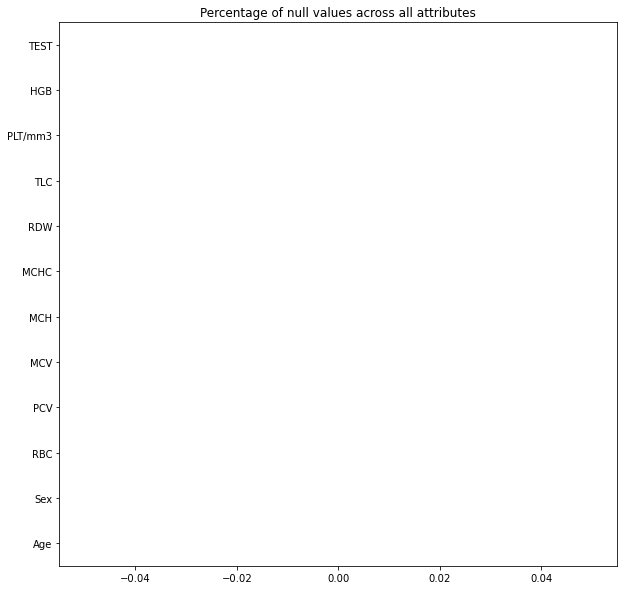

In [8]:
plt.figure(figsize=(10,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='barh')
plt.title("Percentage of null values across all attributes")
plt.savefig("Percentage of null values in the dataset", dpi=800,bbox_inches = 'tight')

In [9]:
df= df[['Age','Sex','RBC','PCV','MCV','MCH','MCHC','RDW','TLC','PLT/mm3','HGB','TEST']]        

In [10]:
df.columns

Index(['Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC',
       'PLT/mm3', 'HGB', 'TEST'],
      dtype='object')

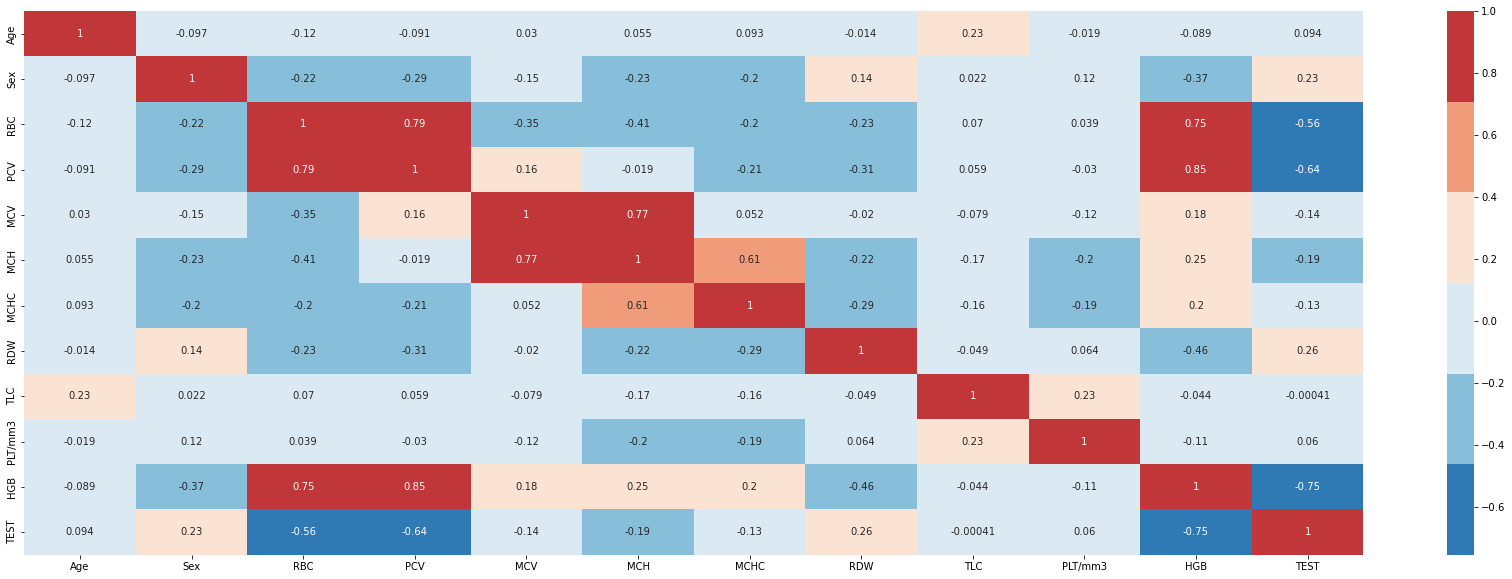

<Figure size 432x288 with 0 Axes>

In [11]:
#Pearsons Co-relation
df = df.astype('float64')
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(30,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.color_palette('RdBu_r'), 
            annot=True)
plt.show()
plt.savefig("Pearson.png", dpi=600,bbox_inches = 'tight')

In [12]:
from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('TEST', axis=1)
y = df['TEST']

oversample = BorderlineSMOTE()
x, y = oversample.fit_resample(x, y)

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rfclassifier = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
rfclassifier.fit(x_train, y_train)
rfclassifier.best_params_




Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 300}

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()



rf.fit(x_train, y_train)

RandomForestClassifier()

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred = rf.predict(x_test)
y_proba = rf.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[60  3]
 [ 0 62]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        63
         1.0       0.95      1.00      0.98        62

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125





accuracy 0.98
precision 0.95
recall 1.0
AUC: 1.0
Precision-Recall: 0.99


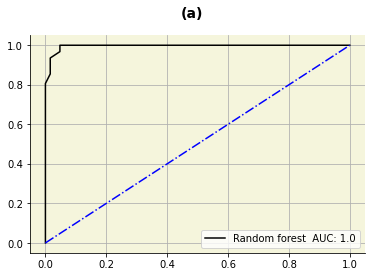

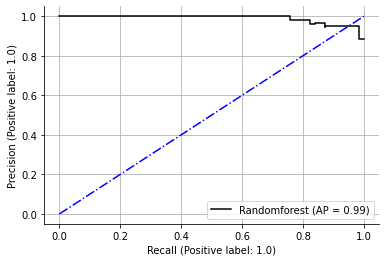

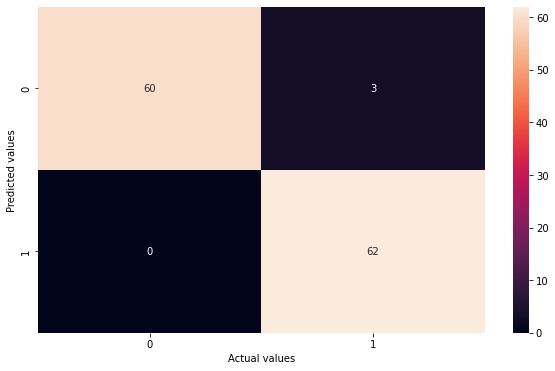

In [16]:
# RandomForest summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Random forest  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC RandomForest", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(rfclassifier, x_test, y_test,color='xkcd:black', name = 'Randomforest')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve random forest", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Random forest", dpi=800,bbox_inches = 'tight')
    
    

In [17]:
from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('TEST', axis=1)
y = df['TEST']

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)


In [18]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'penalty': ['l2'],
    'C': [0.001,0.01,0.1,1,10,100,1000]
}

# Create a based model
lr = LogisticRegression()
# Instantiate the grid search model
lrClassifier = GridSearchCV(estimator = lr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

lrClassifier.fit(x_train, y_train)
lrClassifier.best_params_


Fitting 3 folds for each of 7 candidates, totalling 21 fits


{'C': 10, 'penalty': 'l2'}

[[42  4]
 [ 3 61]]
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92        46
         1.0       0.94      0.95      0.95        64

    accuracy                           0.94       110
   macro avg       0.94      0.93      0.93       110
weighted avg       0.94      0.94      0.94       110



accuracy 0.94
precision 0.94
recall 0.95
AUC: 1.0
Precision-Recall: 1.0


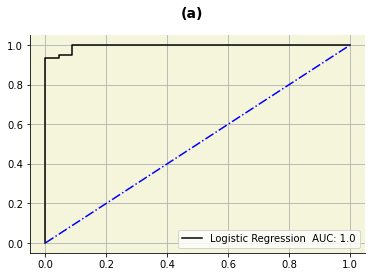

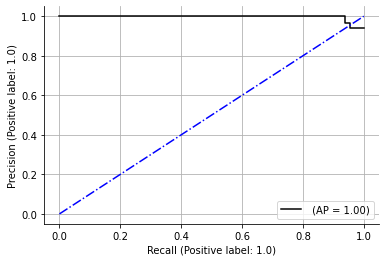

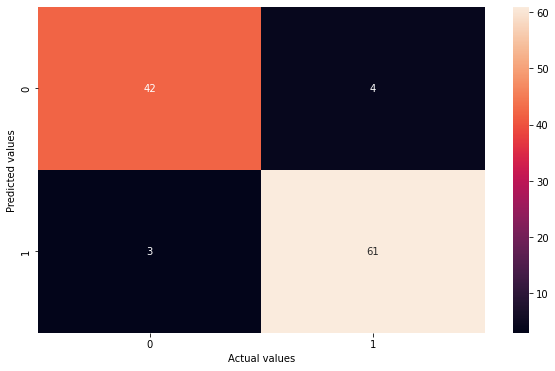

In [19]:
y_pred = lrClassifier.predict(x_test)
y_proba = lrClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# RandomForest summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Logistic Regression  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Logistic regression", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(lrClassifier, x_test, y_test,color='xkcd:black', name = '')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve logistic regression", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matrix Logistic regression", dpi=800,bbox_inches = 'tight')

In [20]:
from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('TEST', axis=1)
y = df['TEST']

oversample = BorderlineSMOTE()
x, y = oversample.fit_resample(x, y)

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)

In [21]:
classifier_dtc = DecisionTreeClassifier()
classifier_dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
y_pred=classifier_dtc.predict(x_test)

In [23]:
#ELI5
import eli5 as eli
eli.explain_weights(classifier_dtc)

Weight,Feature
0.8409,x10
0.1391,x1
0.0200,x2
0,x9
0,x8
0,x7
0,x6
0,x5
0,x4
0,x3


In [24]:
eli.explain_prediction(classifier_dtc , np.array(x_test)[1])

Explanation(estimator='DecisionTreeClassifier()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=1.0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.5017182130584192, std=None, value=1.0), FeatureWeight(feature='x10', weight=0.45511631931568153, std=None, value=-0.4362660249718682), FeatureWeight(feature='x2', weight=0.043165467625899234, std=None, value=-1.052530351704151)], neg=[], pos_remaining=0, neg_remaining=0), proba=1.0, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [25]:
eli.show_prediction(classifier_dtc, x_test.iloc[1],
                    feature_names=list(x_train.columns),
                    show_feature_values=True)

In [26]:
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
    'min_samples_split' : range(10,500,20),
    'splitter' : ['best', 'random'],
    'min_samples_leaf': [1,5,8,11],
    'max_features': ['log2', 'sqrt','auto']
}

# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
dtClassifier = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

dtClassifier.fit(x_train, y_train)
dtClassifier.best_params_

Fitting 3 folds for each of 21600 candidates, totalling 64800 fits


{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'best'}

[[58  5]
 [ 0 62]]
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        63
         1.0       0.93      1.00      0.96        62

    accuracy                           0.96       125
   macro avg       0.96      0.96      0.96       125
weighted avg       0.96      0.96      0.96       125



accuracy 0.96
precision 0.93
recall 1.0
AUC: 0.97
Precision-Recall: 0.94


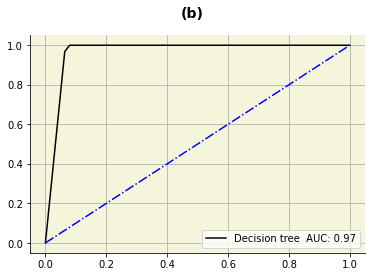

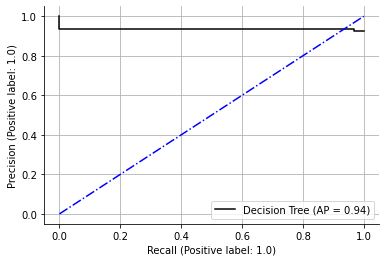

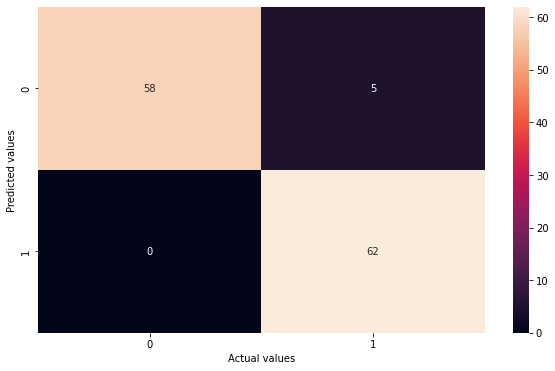

In [27]:
y_pred = dtClassifier.predict(x_test)
y_proba = dtClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(b)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Decision tree  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Decision Tree", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(dtClassifier, x_test, y_test,color='xkcd:black', name = 'Decision Tree')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve Decision Tree", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Decision Tree", dpi=800,bbox_inches = 'tight')

In [28]:
from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('TEST', axis=1)
y = df['TEST']

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)

In [29]:
# Create a based model
knn = KNeighborsClassifier(algorithm = 'brute')

k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid search model
knnClassifier = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

knnClassifier.fit(x_train, y_train)
knnClassifier.best_params_

Fitting 3 folds for each of 99 candidates, totalling 297 fits


{'n_neighbors': 91}

[[34 12]
 [ 4 60]]
              precision    recall  f1-score   support

         0.0       0.89      0.74      0.81        46
         1.0       0.83      0.94      0.88        64

    accuracy                           0.85       110
   macro avg       0.86      0.84      0.85       110
weighted avg       0.86      0.85      0.85       110



accuracy 0.85
precision 0.83
recall 0.94
AUC: 0.96
Precision-Recall: 0.97


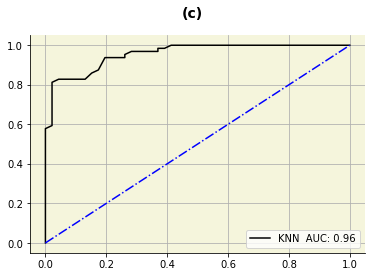

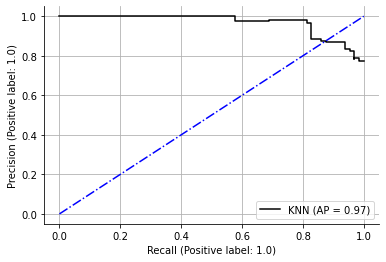

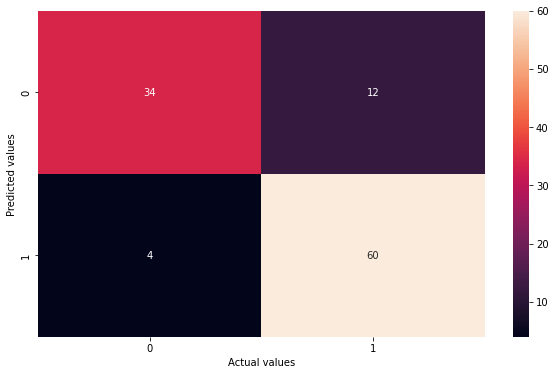

In [30]:
y_pred = knnClassifier.predict(x_test)
y_proba = knnClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(c)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='KNN  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC KNN", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(knnClassifier, x_test, y_test,color='xkcd:black', name = 'KNN')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR KNN", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix KNN", dpi=800,bbox_inches = 'tight')
    


In [31]:
from sklearn import svm

from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('TEST', axis=1)
y = df['TEST']

oversample = BorderlineSMOTE()
x, y = oversample.fit_resample(x, y)

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)

In [32]:
# Create a based model
clf = svm.SVC(kernel='linear',probability=True)



clf.fit(x_train, y_train)


SVC(kernel='linear', probability=True)

[[61  2]
 [ 4 58]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95        63
         1.0       0.97      0.94      0.95        62

    accuracy                           0.95       125
   macro avg       0.95      0.95      0.95       125
weighted avg       0.95      0.95      0.95       125



accuracy 0.95
precision 0.97
recall 0.94
AUC: 1.0
Precision-Recall: 1.0


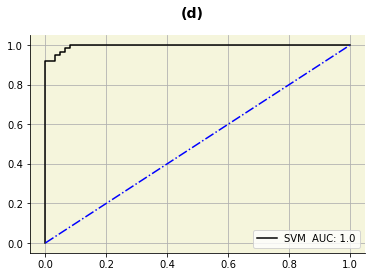

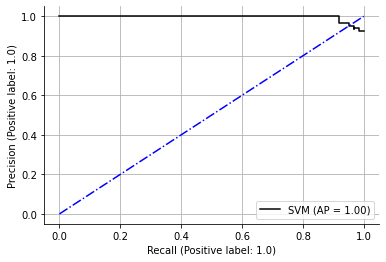

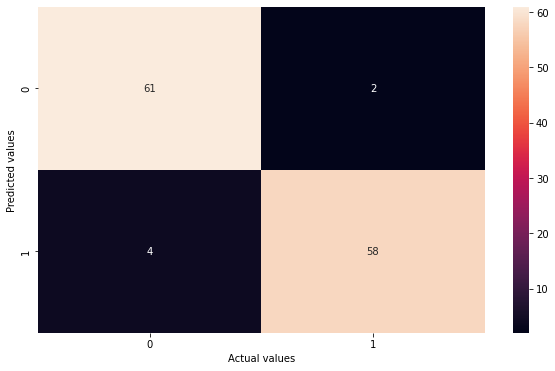

In [33]:
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(d)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='SVM  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC SVM", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(clf, x_test, y_test,color='xkcd:black', name = 'SVM')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve SVM", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix SVM", dpi=800,bbox_inches = 'tight')
    

In [34]:
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('TEST', axis=1)
y = df['TEST']

oversample = BorderlineSMOTE()
x, y = oversample.fit_resample(x, y)

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)

In [35]:
#Create a Gaussian Classifier
modelGaussian = GaussianNB()

# Train the model using the training sets
nb=modelGaussian.fit(x_train,y_train)

[[57  6]
 [ 4 58]]
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92        63
         1.0       0.91      0.94      0.92        62

    accuracy                           0.92       125
   macro avg       0.92      0.92      0.92       125
weighted avg       0.92      0.92      0.92       125



accuracy 0.92
precision 0.91
recall 0.94
AUC: 0.97
Precision-Recall: 0.97


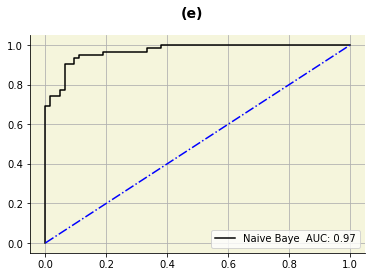

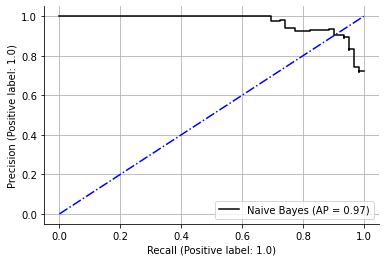

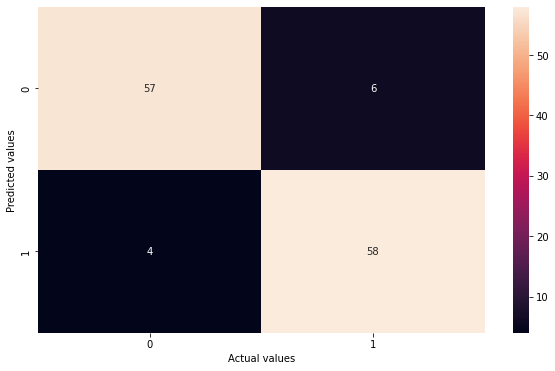

In [36]:
y_pred = nb.predict(x_test)
y_proba = nb.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(e)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Naive Baye  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Naive Bayes", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(nb, x_test, y_test,color='xkcd:black', name = 'Naive Bayes')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve Naive Bayes", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Naive Bayes", dpi=800,bbox_inches = 'tight')

In [37]:
ecdvv

NameError: name 'ecdvv' is not defined

In [ ]:
# Three models 
clf1 = lrClassifier
clf2 = dtClassifier
clf3 = knnClassifier 
clf4 = clf
clf5= modelGaussian
clf6=rf

from mlxtend.classifier import StackingClassifier
# meta-classifier 
meta_clf = LogisticRegression(random_state=42)

# Stacking 
stack1 = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4 , clf5, clf6],
                           use_probas=True,
                           average_probas=False,
                          meta_classifier=meta_clf)

In [ ]:
stack1.fit(x_train, y_train)
y_pred = stack1.predict(x_test)
y_proba = stack1.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# StackingClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(f)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Stacking   AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig("AUC STACKA", dpi=800,bbox_inches = 'tight')
    
plt.show()
    

cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.suptitle('(a)', fontsize=10,fontweight='bold')
plt.savefig("Confusion Matix StackA", dpi=800,bbox_inches = 'tight')


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('TEST', axis=1)
y = df['TEST']

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [10, 20, 30, 40, 50],
}

In [ ]:
mlp=MLPClassifier()

In [ ]:

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train,y_train)
print('Best parameters found:\n', clf.best_params_)


In [ ]:
y_pred = nb.predict(x_test)
y_proba = nb.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(b)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='MLP   AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC MLP", dpi=800,bbox_inches = 'tight')
    
plt.show()


#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(clf, x_test, y_test,color='xkcd:black', name = 'MLP')
plt.grid(True)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.savefig("PR curve MLP", dpi=800,bbox_inches = 'tight')

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('TEST', axis=1)
y = df['TEST']

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)

In [ ]:


# Create a based model
ad = AdaBoostClassifier()



ad.fit(x_train, y_train)



In [ ]:
y_pred = ad.predict(x_test)
y_proba = ad.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ExtratreeClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(c)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Adaboost  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Adaboost", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(dtClassifier, x_test, y_test,color='xkcd:black', name = 'Adaboost')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve Adaboost", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Adaboost", dpi=800,bbox_inches = 'tight')

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('TEST', axis=1)
y = df['TEST']

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)

In [ ]:
from catboost import CatBoostClassifier

param_grid = {'depth':[3,1,2],
          'iterations':[250,100],
          'learning_rate':[0.03,0.001], 
          'l2_leaf_reg':[3,1,5,10],
          'border_count':[32,5,10],
        
             }

# Create a based model
cd = CatBoostClassifier()
# Instantiate the grid search model
grid_searchCatBoostClassifier = GridSearchCV(estimator = cd, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_searchCatBoostClassifier.fit(x_train, y_train)
grid_searchCatBoostClassifier.best_params_

In [ ]:
y_pred = grid_searchCatBoostClassifier.predict(x_test)
y_proba = grid_searchCatBoostClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ExtratreeClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(d)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Catboost  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Catboost", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(grid_searchCatBoostClassifier, x_test, y_test,color='xkcd:black', name = 'Catboost')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve Catboost", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Catboost", dpi=800,bbox_inches = 'tight')
    

In [ ]:
from lightgbm import LGBMClassifier

from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('TEST', axis=1)
y = df['TEST']

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)

param_grid = {
     'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
             
        
             }

# Create a based model
lg =  LGBMClassifier()
# Instantiate the grid search model
lgm = GridSearchCV(estimator = lg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

lgm.fit(x_train, y_train)
lgm.best_params_

In [ ]:


y_pred = lgm.predict(x_test)
y_proba = lgm.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ExtratreeClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(e)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Lightgbm  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Lightgbm", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(lgm, x_test, y_test,color='xkcd:black', name = 'Lightgbm')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve Lightgbm", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Lightgbm", dpi=800,bbox_inches = 'tight')
    

In [ ]:
from xgboost import XGBClassifier

from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('TEST', axis=1)
y = df['TEST']


SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)

param_grid = {
    "learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],
             
        
             }

# Create a based model
lg = XGBClassifier()
# Instantiate the grid search model
xgb = GridSearchCV(estimator = lg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

xgb.fit(x_train, y_train)
xgb.best_params_



In [ ]:
y_pred = xgb.predict(x_test)
y_proba = xgb.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ExtratreeClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(f)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Xgboost  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Xgboost", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(xgb, x_test, y_test,color='xkcd:black', name = 'Xgboost')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve xgboost", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Xgboost", dpi=800,bbox_inches = 'tight')

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('TEST', axis=1)
y = df['TEST']

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)

param_grid = {
     'n_estimators': range(50,126,25),
        'min_samples_leaf': range(20,50,5),
        'min_samples_split': range(15,36,5),
        
             }

# Create a based model
lg = ExtraTreesClassifier()
# Instantiate the grid search model
etc = GridSearchCV(estimator = lg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

etc.fit(x_train, y_train)
etc.best_params_

In [ ]:


y_pred = etc.predict(x_test)
y_proba = etc.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ExtratreeClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(g)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Extratrees  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Extratrees", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(etc, x_test, y_test,color='xkcd:black', name = 'Extra trees')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("Extratrees pr curve random forest", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Extra Trees", dpi=800,bbox_inches = 'tight')
    

In [ ]:
import shap
shap.initjs()
explainer = shap.Explainer(rf.predict, x_train)
shap_values = explainer(x_train)

In [ ]:
fig=plt.figure()
fig=shap.plots.beeswarm(shap_values, max_display=25,show=False)
plt.savefig("BeeSwarm1.png", dpi=700,bbox_inches = 'tight')
plt.show()

In [ ]:
# Average feature contribution
fig=shap.summary_plot(shap_values, x_train, plot_type="bar",show=False)
plt.savefig("BarChartSHAP.png", dpi=100,bbox_inches = 'tight')
plt.show()

In [ ]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    mode='classification'
)

In [ ]:
exp = interpretor.explain_instance(
    data_row=x_test.iloc[12], ##new data
    predict_fn=rf.predict_proba
)

fig=exp.show_in_notebook(show_table=True)

In [ ]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()
    plt.savefig("LIME1.png", dpi=600,bbox_inches = 'tight')

In [ ]:
exp = interpretor.explain_instance(
    data_row=x_test.iloc[13], ##new data
    predict_fn=rf.predict_proba
)

fig=exp.show_in_notebook(show_table=True)

with plt.style.context("ggplot"):
    exp.as_pyplot_figure()
    plt.savefig("LIME2.png", dpi=600,bbox_inches = 'tight')

In [ ]:
import feyn

In [ ]:
ql = feyn.connect_qlattice()

In [ ]:
ql.reset(random_seed=42)

In [ ]:
fig = ql.auto_run(df, output_name="TEST", kind="classification", max_complexity=5)

In [ ]:
fig[0].sympify(2)